In [1]:
import numpy as np  # Unleashing numerical wizardry
import seaborn as sns  # Crafting beautiful data visual symphonies
import pandas as pd  # Mastering the art of data manipulation
import matplotlib.pyplot as plt  # Painting data stories on a visual canvas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv("student_spending (1).csv")
data.head()


,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [3]:
from copy import deepcopy
df = deepcopy(data)
df.head(10)

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
5,5,25,Non-binary,Sophomore,Computer Science,523,790,3151,413,386,122,131,73,38,234,108,99,Mobile Payment App
6,6,23,Female,Freshman,Engineering,1354,69,4973,812,398,101,213,21,38,157,117,48,Credit/Debit Card
7,7,23,Female,Junior,Economics,631,748,3966,571,269,92,251,37,90,152,56,62,Mobile Payment App
8,8,22,Non-binary,Senior,Computer Science,1402,248,5638,599,354,82,155,123,41,162,172,194,Credit/Debit Card
9,9,18,Female,Junior,Computer Science,1423,74,3977,626,249,117,123,51,74,243,34,196,Mobile Payment App


In [4]:
df.columns

Index(['Unnamed: 0', 'age', 'gender', 'year_in_school', 'major',
       'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
       'transportation', 'books_supplies', 'entertainment', 'personal_care',
       'technology', 'health_wellness', 'miscellaneous',
       'preferred_payment_method'],
      dtype='object')

In [5]:
del df['Unnamed: 0']

In [6]:
df.head()


,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [7]:
df.isna().sum()

age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
from scipy import stats
numeric_columns = ['age', 'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
                    'transportation', 'books_supplies', 'entertainment', 'personal_care',
                    'technology', 'health_wellness', 'miscellaneous']

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Displaying the outliers
print("\nOutliers (IQR Method):")
print(outliers_iqr.sum())
print("\nNo outliers detected")


Outliers (IQR Method):
age                0
monthly_income     0
financial_aid      0
tuition            0
housing            0
food               0
transportation     0
books_supplies     0
entertainment      0
personal_care      0
technology         0
health_wellness    0
miscellaneous      0
dtype: int64

No outliers detected


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   object
 2   year_in_school            1000 non-null   object
 3   major                     1000 non-null   object
 4   monthly_income            1000 non-null   int64 
 5   financial_aid             1000 non-null   int64 
 6   tuition                   1000 non-null   int64 
 7   housing                   1000 non-null   int64 
 8   food                      1000 non-null   int64 
 9   transportation            1000 non-null   int64 
 10  books_supplies            1000 non-null   int64 
 11  entertainment             1000 non-null   int64 
 12  personal_care             1000 non-null   int64 
 13  technology                1000 non-null   int64 
 14  health_wellness          

In [11]:
for column in df.columns: 
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1000 non-null   int64   
 1   gender                    1000 non-null   category
 2   year_in_school            1000 non-null   category
 3   major                     1000 non-null   category
 4   monthly_income            1000 non-null   int64   
 5   financial_aid             1000 non-null   int64   
 6   tuition                   1000 non-null   int64   
 7   housing                   1000 non-null   int64   
 8   food                      1000 non-null   int64   
 9   transportation            1000 non-null   int64   
 10  books_supplies            1000 non-null   int64   
 11  entertainment             1000 non-null   int64   
 12  personal_care             1000 non-null   int64   
 13  technology                1000 non-null   int64  

In [16]:
from tabulate import tabulate

def column_info_table(df):
    # Create a DataFrame with column information
    table_df = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes.values,
        'Number of Unique Values': df.nunique().values,
        'Unique Values': [df[column].unique()[:5] for column in df.columns]
    })

    return table_df

# Assuming df is your DataFrame
result_table = column_info_table(df)

# Display the table using tabulate
print(tabulate(result_table, headers='keys', tablefmt='pretty'))

+----+--------------------------+-----------+-------------------------+---------------------------------------------------------------------------------------------------+
|    |       Column Name        | Data Type | Number of Unique Values |                                           Unique Values                                           |
+----+--------------------------+-----------+-------------------------+---------------------------------------------------------------------------------------------------+
| 0  |           age            |   int64   |            8            |                                         [19 24 23 20 25]                                          |
| 1  |          gender          | category  |            3            |                                 ['Non-binary', 'Female', 'Male']                                  |
|    |                          |           |                         |                     Categories (3, object): ['Female', 'Male', 'Non-

In [14]:
!pip install tabulate


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,21.675,2.322664,18.0,20.00,22.0,24.00,25.0
monthly_income,1000.0,1020.650,293.841161,501.0,770.75,1021.0,1288.25,1500.0
financial_aid,1000.0,504.771,287.092575,0.0,261.00,513.0,751.50,1000.0
tuition,1000.0,4520.395,860.657944,3003.0,3779.75,4547.5,5285.00,6000.0
housing,1000.0,696.006,171.218620,401.0,538.75,704.5,837.25,1000.0
food,1000.0,252.642,86.949606,100.0,175.00,255.0,330.00,400.0
transportation,1000.0,124.637,43.557990,50.0,88.00,123.0,162.25,200.0
books_supplies,1000.0,174.761,72.404518,50.0,112.00,175.0,238.00,300.0
entertainment,1000.0,84.814,37.970451,20.0,54.00,86.0,116.00,150.0
personal_care,1000.0,60.699,22.898007,20.0,41.00,62.0,80.00,100.0


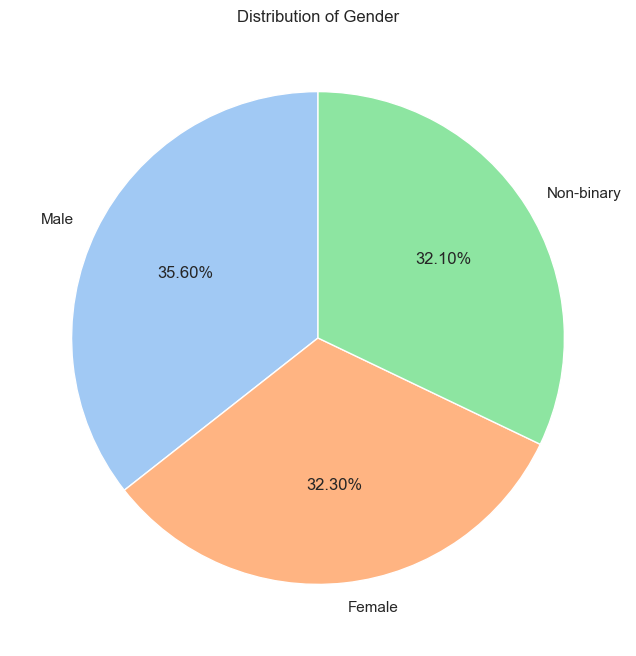

In [17]:
sns.set(style="whitegrid")

# Create a pie chart for 'gender'
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.2f%%', colors=sns.color_palette('pastel'), startangle=90)

# Set plot title
ax.set_title('Distribution of Gender')

# Display the plot
plt.show()


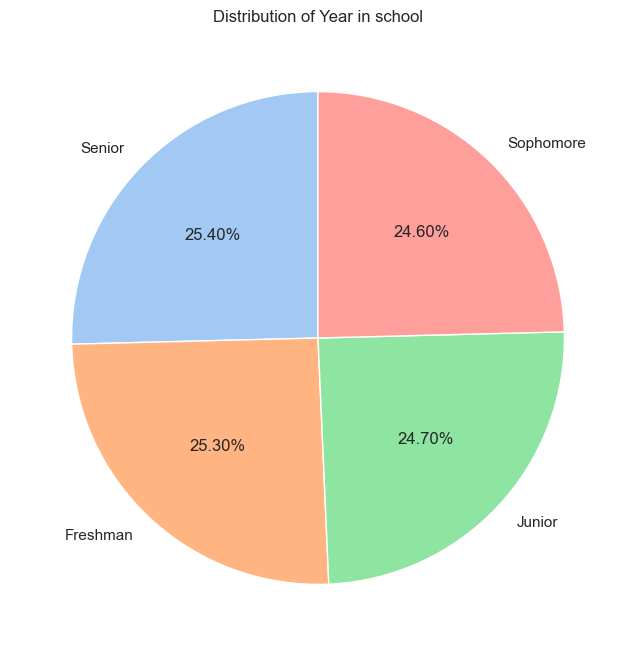

In [18]:
sns.set(style="whitegrid")

# Create a pie chart for 'year_in_school'
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df['year_in_school'].value_counts(), labels=df['year_in_school'].value_counts().index, autopct='%1.2f%%', colors=sns.color_palette('pastel'), startangle=90)

# Set plot title
ax.set_title('Distribution of Year in school')

# Display the plot
plt.show()

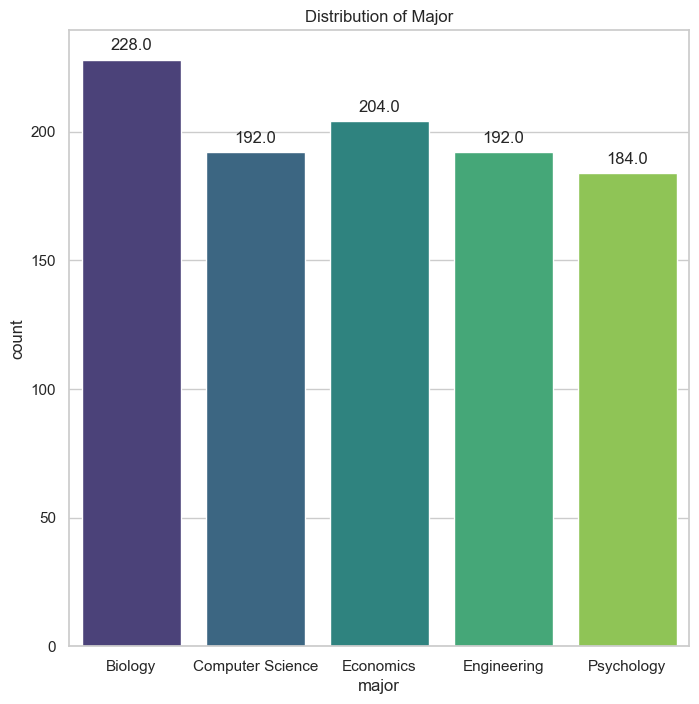

In [19]:
sns.set(style="whitegrid")

# Create a count plot for 'major' with annotations
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='major', data=df, palette='viridis')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set plot title
plt.title('Distribution of Major')

# Display the plot
plt.show()

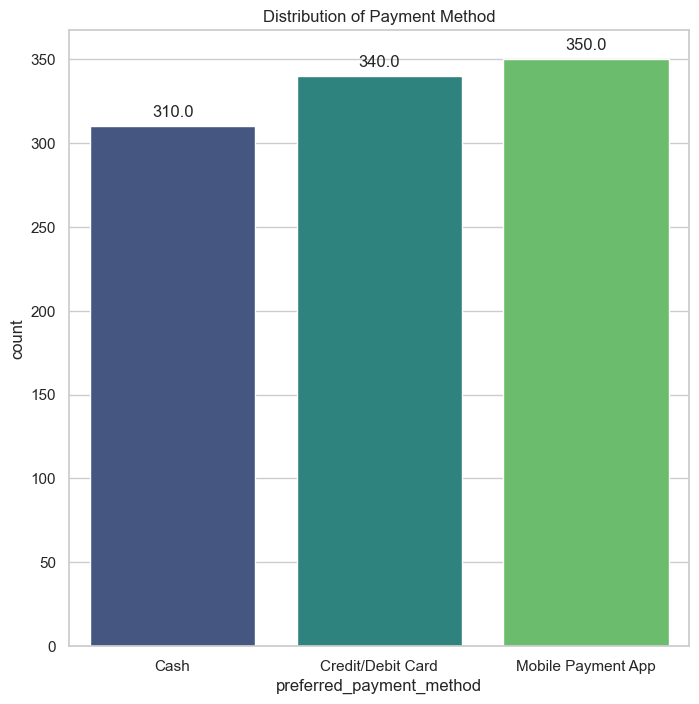

In [20]:
sns.set(style="whitegrid")

# Create a count plot for 'preferred_payment_method' with annotations
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='preferred_payment_method', data=df, palette='viridis')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set plot title
plt.title('Distribution of Payment Method')

# Display the plot
plt.show()

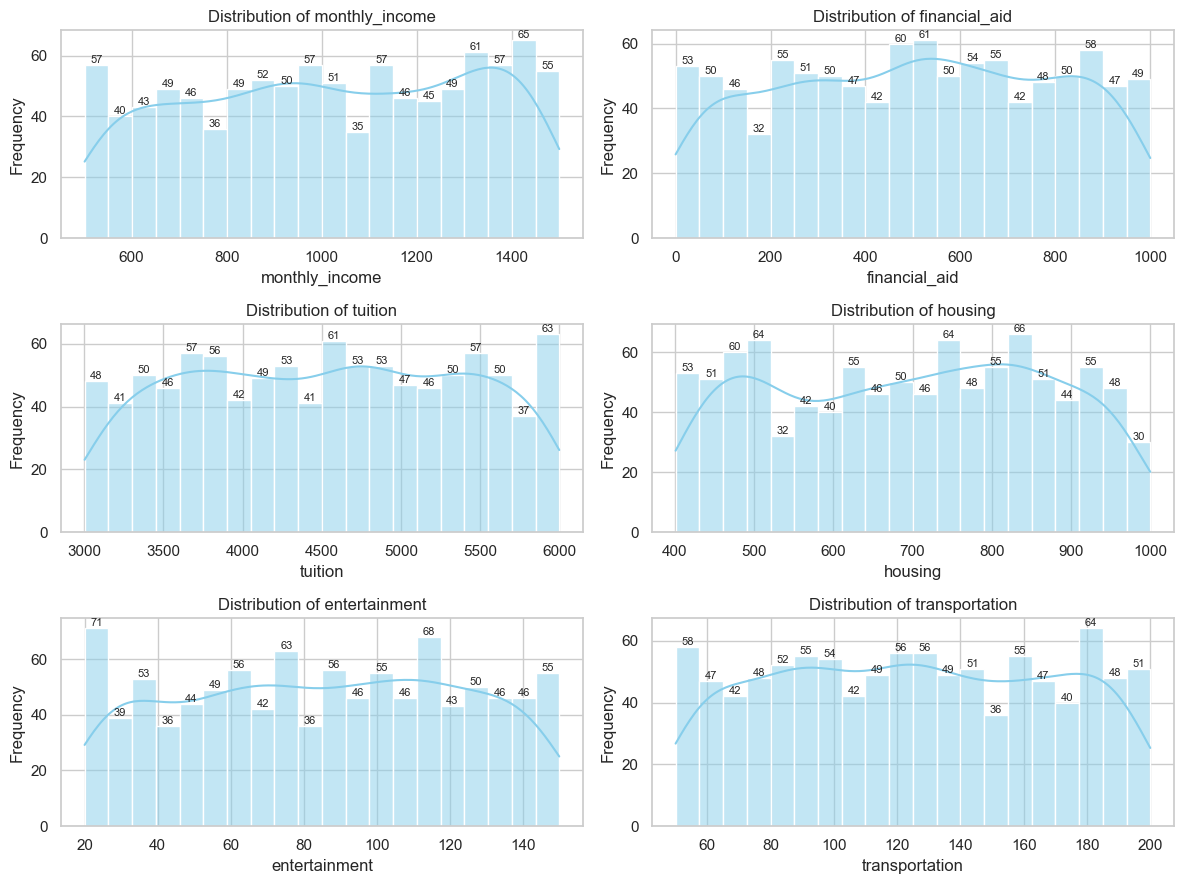

In [21]:
selected_columns = ['monthly_income', 'financial_aid', 'tuition', 'housing', 'entertainment', 'transportation']

# Determine the number of rows and columns for subplots
num_rows = len(selected_columns) // 2 + len(selected_columns) % 2
num_cols = 2

# Set up subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i], color='skyblue')
    
    # Add numbers on top of each bar
    for rect in axes[i].patches:
        height = rect.get_height()
        axes[i].text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8)

    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

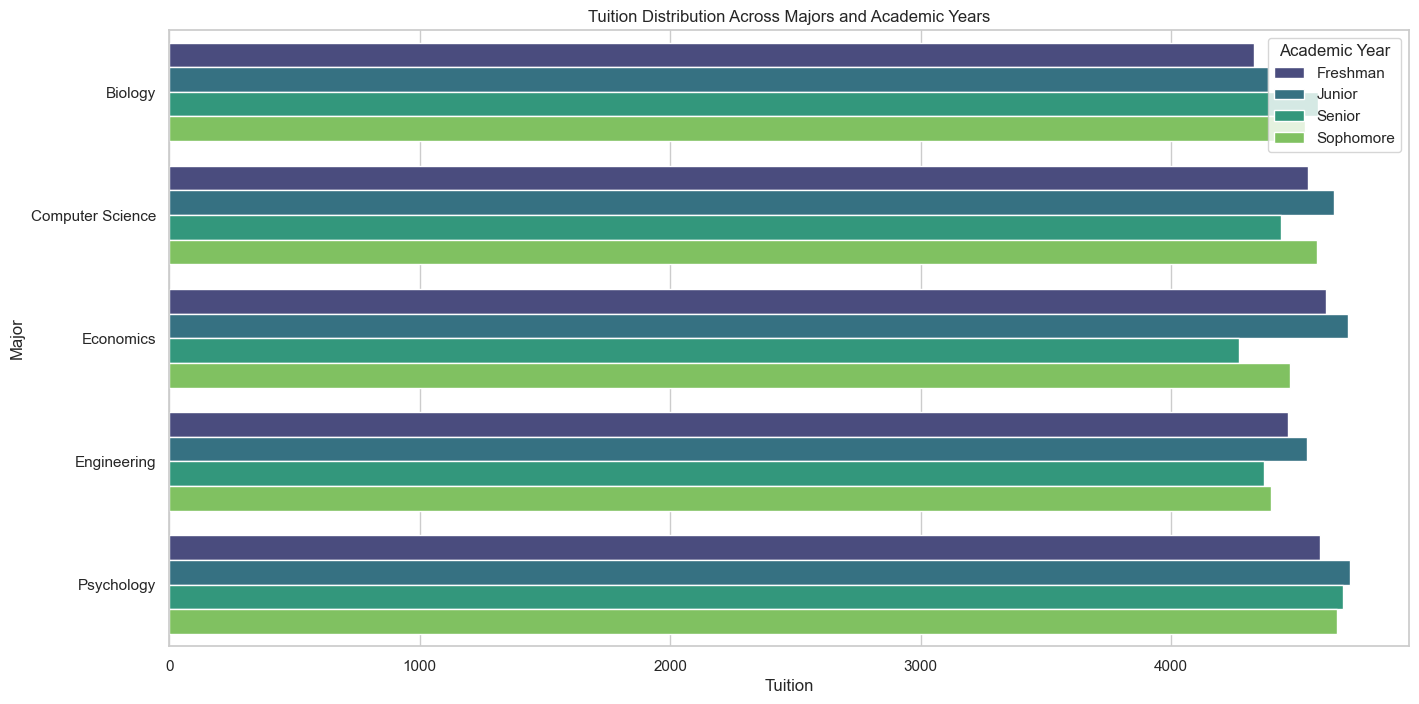

In [23]:
selected_columns = ['tuition', 'major', 'year_in_school']

# Filter the DataFrame for non-null values in the selected columns
filtered_df = df[selected_columns].dropna()

# Set up the bar plot
plt.figure(figsize=(16, 8))
sns.barplot(x='tuition', y='major', hue='year_in_school', data=filtered_df, ci=None, palette='viridis')

# Set plot title and labels
plt.title('Tuition Distribution Across Majors and Academic Years')
plt.xlabel('Tuition')
plt.ylabel('Major')

# Display the legend
plt.legend(title='Academic Year')

# Show the plot
plt.show()

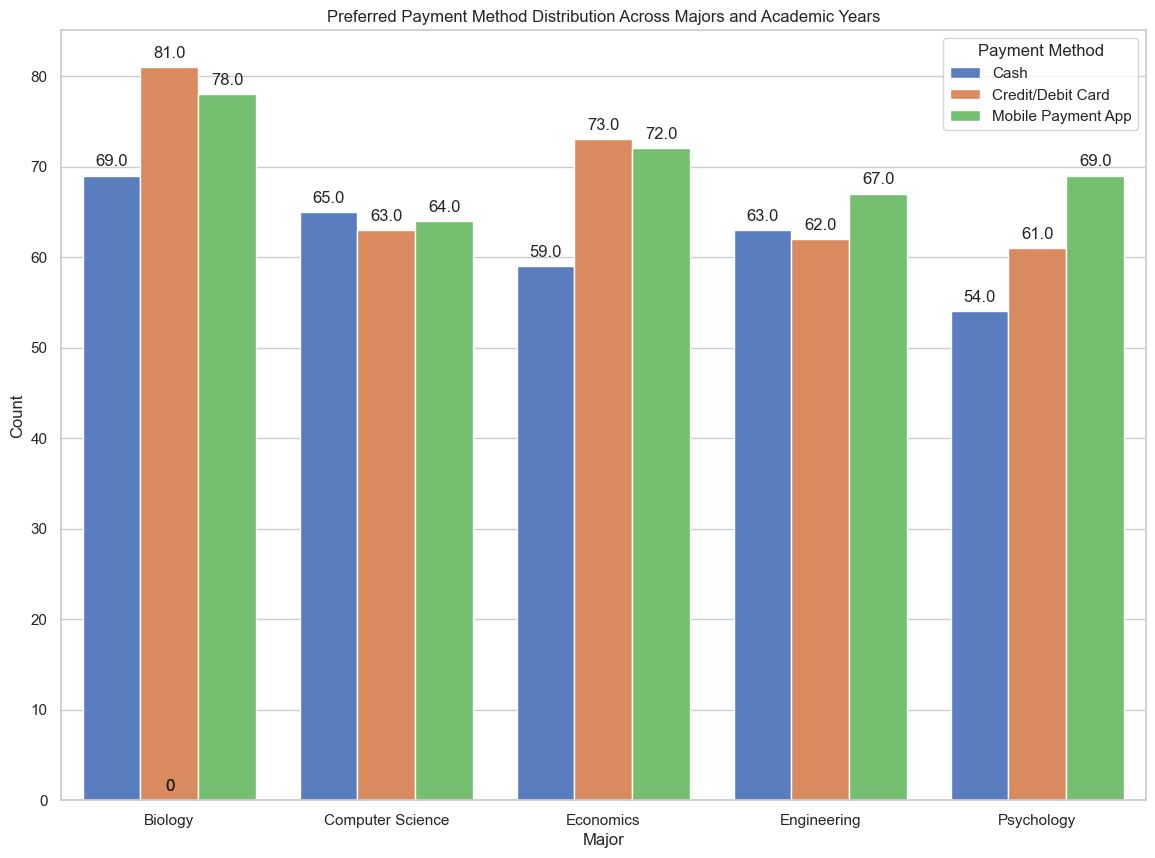

In [24]:
selected_columns = ['preferred_payment_method', 'major', 'year_in_school']

# Filter the DataFrame for non-null values in the selected columns
filtered_df = df[selected_columns].dropna()

# Set up the bar plot
plt.figure(figsize=(14, 10))
sns.countplot(x='major', hue='preferred_payment_method', data=filtered_df, palette='muted', hue_order=['Cash', 'Credit/Debit Card', 'Mobile Payment App'])

# Display the counts on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set plot title and labels
plt.title('Preferred Payment Method Distribution Across Majors and Academic Years')
plt.xlabel('Major')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Payment Method')

# Show the plot
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy() # Create a copy of the dataset for correlation analysis after encoding categorical columns
label_encoder = LabelEncoder() # Initialize LabelEncoder from scikit-learn
categorical_columns = ['gender', 'year_in_school', 'major', 'preferred_payment_method'] # List of categorical columns to be encoded

# Apply LabelEncoder to each categorical column in the copied dataset
for column in categorical_columns: 
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

correlation_matrix = df_copy.corr()
correlation_matrix.iloc[:,-1].sort_values(ascending=False)

preferred_payment_method    1.000000
housing                     0.040399
financial_aid               0.037379
miscellaneous               0.027421
major                       0.017775
monthly_income             -0.009190
technology                 -0.018255
tuition                    -0.020909
food                       -0.021536
age                        -0.022827
gender                     -0.030592
personal_care              -0.034246
year_in_school             -0.043819
health_wellness            -0.044043
transportation             -0.049212
books_supplies             -0.054213
entertainment              -0.064413
Name: preferred_payment_method, dtype: float64

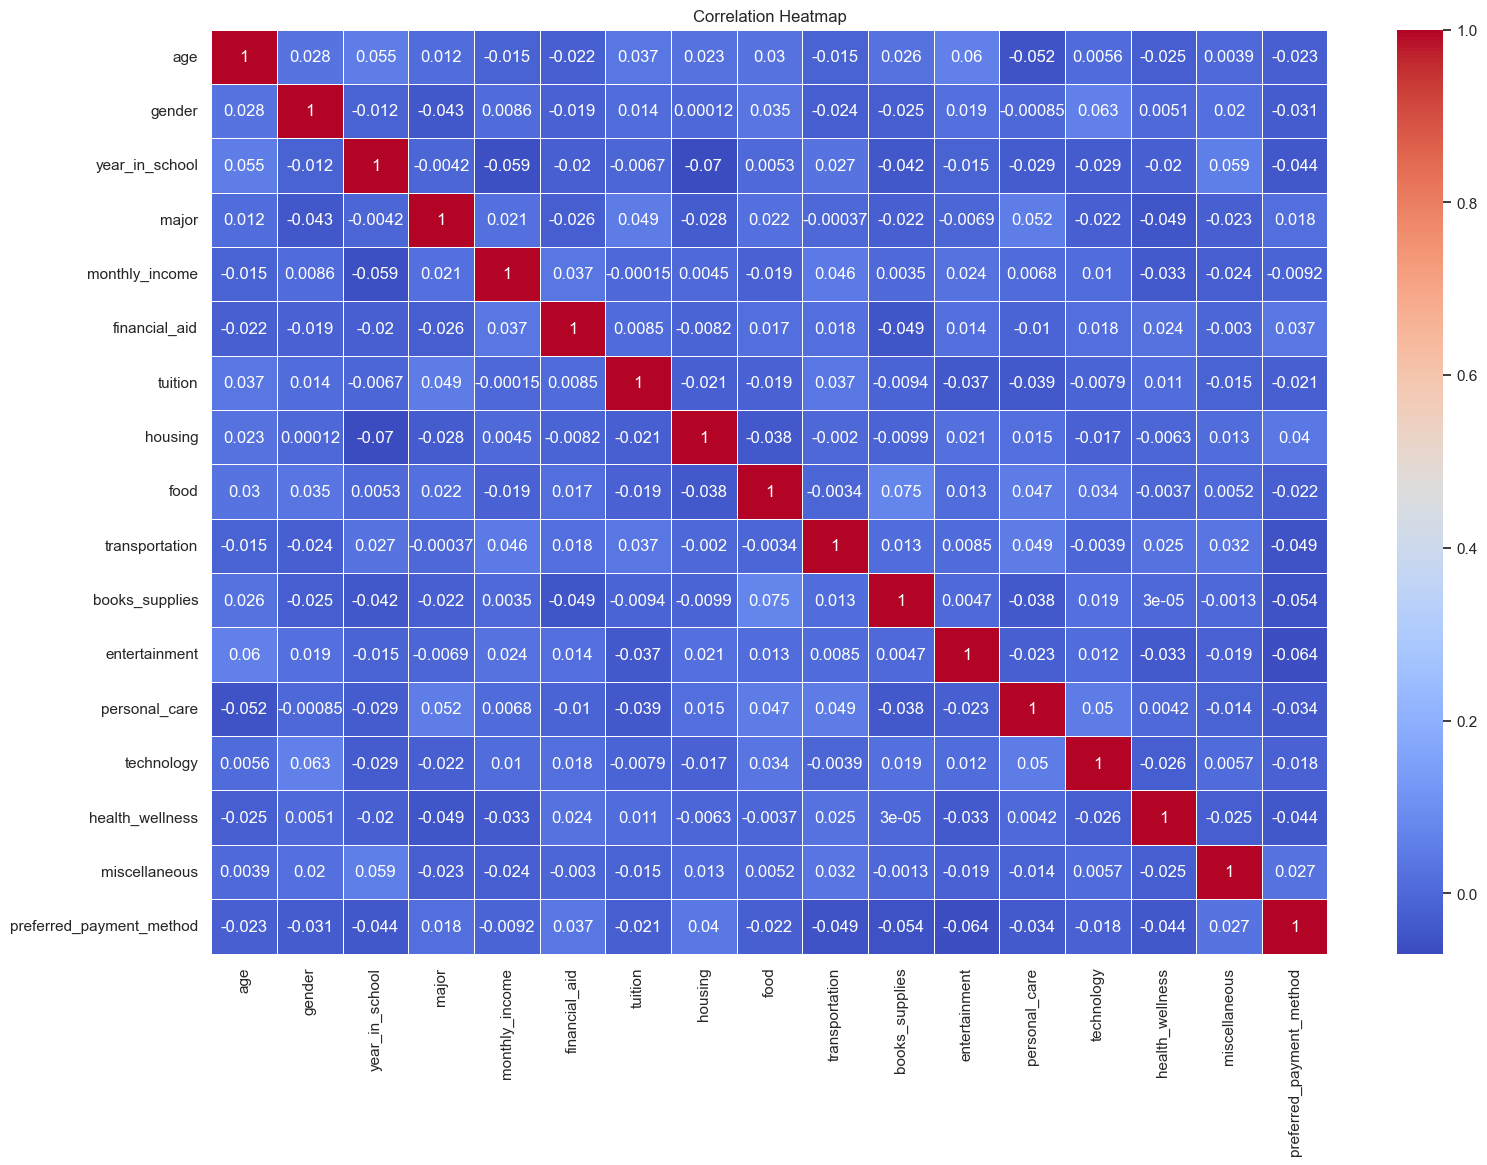

In [26]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5 , annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
spendings = ['tuition', 'housing', 'food', 'transportation', 'books_supplies', 'entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous']
total_mean = df[spendings]
total_mean = total_mean.mean()

print(total_mean)

tuition            4520.395
housing             696.006
food                252.642
transportation      124.637
books_supplies      174.761
entertainment        84.814
personal_care        60.699
technology          178.304
health_wellness     114.310
miscellaneous       108.910
dtype: float64


(6000.0, 6500.0)

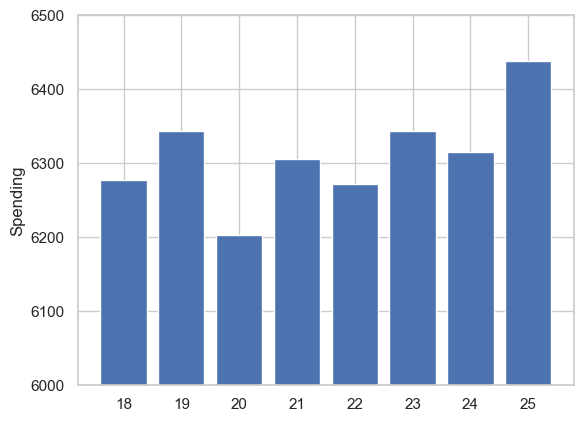

In [30]:
age = df['age'].unique()

by_age = df.groupby('age')[spendings].mean().reset_index()

# making bar charts
category = by_age['age'].values
heights = by_age[spendings].sum(axis = 1).values

plt.bar(category, heights, width = 0.8)
plt.ylabel('Spending')
plt.ylim(6000,6500)

In [34]:
features = ['age', 'gender', 'major', 'preferred_payment_method']
for feature in features[1:]:
    print(f'Unique number of categories in {feature}: {df[feature].unique()}')

Unique number of categories in gender: ['Non-binary', 'Female', 'Male']
Categories (3, object): ['Female', 'Male', 'Non-binary']
Unique number of categories in major: ['Psychology', 'Economics', 'Computer Science', 'Engineering', 'Biology']
Categories (5, object): ['Biology', 'Computer Science', 'Economics', 'Engineering', 'Psychology']
Unique number of categories in preferred_payment_method: ['Credit/Debit Card', 'Cash', 'Mobile Payment App']
Categories (3, object): ['Cash', 'Credit/Debit Card', 'Mobile Payment App']


In [35]:
dummy_df1 = pd.get_dummies(df['gender'])
dummy_df2 = pd.get_dummies(df['major'])
dummy_df3 = pd.get_dummies(df['preferred_payment_method'])

dummy_df = pd.concat([dummy_df1, dummy_df2, dummy_df3], axis=1)
dummy_df['age'] = df['age']
print(dummy_df.head())

   Female  Male  Non-binary  Biology  Computer Science  Economics  \
0       0     0           1        0                 0          0   
1       1     0           0        0                 0          1   
2       0     0           1        0                 0          1   
3       1     0           0        0                 1          0   
4       1     0           0        0                 1          0   

   Engineering  Psychology  Cash  Credit/Debit Card  Mobile Payment App  age  
0            0           1     0                  1                   0   19  
1            0           0     0                  1                   0   24  
2            0           0     1                  0                   0   24  
3            0           0     0                  0                   1   23  
4            0           0     0                  1                   0   20  


In [37]:
def compute_cost(X, Y, w, b):
    """
    X: numpy array: Shape (m,n)   Input Data
    Y: numpy array: Shape (m,)    Expected Output
    w: numpy array: Shape (n,)    Weightings
    b: scalar:  Bias
    """
    
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - Y[i])**2       
    cost = cost / (2 * m)                      
    return cost

In [38]:
def compute_gradient(X, Y, w, b): 
    """
    X: numpy array: Shape (m,n)   Input Data
    Y: numpy array: Shape (m,)    Expected Output
    w: numpy array: Shape (n,)    Weightings
    b: scalar:  Bias
     """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - Y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
    
    return dj_db, dj_dw

In [ ]:
import math
def gradient_descent(X, Y, w, b, cost_function, gradient_function, alpha, num_iters): 
    """
    X: numpy array: Shape (m,n)   Input Data
    y: numpy array: Shape (m,)    Expected Output
    w: numpy array: Shape (n,)    Weightings
    b: float                      Bias
    cost_function:                function to compute cost made earlier
    gradient_function:            function to compute the gradient
    alpha: (float):               Learning rate
    num_iters: (int):             number of iterations to run gradient descent
      """    
    for i in range(num_iters):

        # Computing the gradient 
        dj_db,dj_dw = gradient_function(X, Y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw  
        b = b - alpha * dj_db 
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            J = cost_function(X, Y, w, b)
            print(f"Iteration {i:4d}: Cost {J:8.2f}   ")
        
    return w, b # returning the optimal w and b parameters f